# Curitiba - Base do 156

Este é um projeto de análise dos dados da base do 156. Consiste em um importador dos dados, um processador, visualizador e, por último exportando os dados em formato Feather.

In [1]:
import qgrid

from pandarallel import pandarallel
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

from curitiba156 import get_downloaded_base156

pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


# Leitura dos dados
Nesse momento os dados são importados por meio da função get_downloaded_base156. Basicamente ele consulta o site do 156, pega o último arquivo CSV e o salva no arquivo `source_data/base_156.csv`. A saída desse comando já entra dentro do pandas por meio do `csv_file` e `encoding`.

In [2]:
csv_file, csv_encoding = get_downloaded_base156()

Fetching latest base of 156...
Latest csv url: http://dadosabertos.c3sl.ufpr.br/curitiba/156/2020-01-01_156_-_Base_de_Dados.csv
File Already exists!
No download needed.
File source_data/base156.csv; Encoding: ISO-8859-1


In [3]:
field_names = ['SOLICITACAO', 'TIPO', 'ORGAO', 'DATA',
               'HORARIO', 'ASSUNTO', 'SUBDIVISAO', 'DESCRICAO',
               'LOGRADOURO_ASS', 'BAIRRO_ASS', 'REGIONAL_ASS',
               'MEIO_RESPOSTA', 'OBSERVACAO', 'SEXO', 'BAIRRO_CIDADAO',
               'REGIONAL_CIDADAO', 'DATA_NASC', 'TIPO_CIDADAO',
               'ORGAO_RESP', 'RESPOSTA_FINAL', 'RESPOSTA_FINAL_DETALHE']

data = pd.read_csv(csv_file, sep=';', encoding=csv_encoding, error_bad_lines=False, skiprows=[0,1], names=field_names)

In [20]:
data['ASSUNTO'].to_list()

['SINALIZAÇÃO VERTICAL',
 'ILUMINAÇÃO PÚBLICA - VIA PÚBLICA',
 'ABORDAGEM SOCIAL DE RUA',
 'OUTROS FUNCIONÁRIOS DO TRANSPORTE COLETIVO',
 'FAROL DO SABER DE ESCOLA',
 'JARDINETES',
 'FISCALIZAÇÃO DE TERRENOS BALDIOS OU EDIFICADOS',
 'PASSEIO',
 'ILUMINAÇÃO PÚBLICA - VIA PÚBLICA',
 'POSTO DE SAÚDE',
 'POSTO DE SAÚDE',
 'ANIMAIS DOMÉSTICOS',
 'PAVIMENTAÇÃO',
 'COLETA',
 'COLETA',
 'COLETA',
 'FAUNA SINANTRÓPICA',
 'DRENAGEM',
 'COHAB',
 'ÔNIBUS',
 'MANUTENÇÃO PREDIAL',
 'ABORDAGEM SOCIAL DE RUA',
 'ABORDAGEM SOCIAL DE RUA',
 'ABORDAGEM SOCIAL DE RUA',
 'ABORDAGEM SOCIAL DE RUA',
 'ABORDAGEM SOCIAL DE RUA',
 'FISCALIZAÇÃO',
 'COLETA',
 'ILUMINAÇÃO PÚBLICA - VIA PÚBLICA',
 'NATAL',
 'FAUNA SINANTRÓPICA',
 'RUA DA CIDADANIA',
 'ILUMINAÇÃO PÚBLICA - VIA PÚBLICA',
 'OUTROS SETORES SMS',
 'POSTO DE SAÚDE',
 'PAVIMENTAÇÃO',
 'TRÂNSITO',
 'COLETA',
 'PROFISSIONAIS/SERVIÇOS CREDENCIADOS',
 'POSTO DE SAÚDE',
 'COLETA',
 'POSTO DE SAÚDE',
 'POSTO DE SAÚDE',
 'TRÂNSITO',
 'COLETA',
 'TRÂNSITO',
 'TR

# Tratamento dos dados
Realizando Tratamento dos dados no dataset. Nesse local será feito limpeza, assim como criação de novos datasets, à partir do primeiro dataset.

In [5]:
# Processando data como tipo Datetime
data['DATA'] = data['DATA'].str.strip()
data['DATA'] = data.parallel_apply(lambda x: datetime.strptime(x['DATA'], '%d/%m/%Y') if type(x['DATA']) is str else None, axis=1)


# Exibição dos dados
O grid a ser exibido usa o QGrid. Ele funciona como uma espécie de Excel.

In [6]:
qgrid.show_grid(data)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [7]:
data_orgaos = data[['ORGAO']].groupby(['ORGAO']).size().reset_index(name='counts').sort_values(['counts'], ascending=False)
qgrid.show_grid(data_orgaos)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

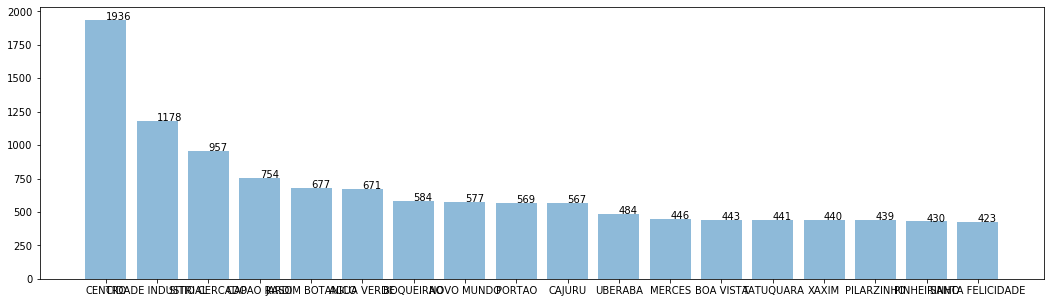

In [8]:
data_top_bairros = data.groupby('BAIRRO_ASS')['BAIRRO_ASS'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(18)

plt.figure(figsize=(18,5))
plt.bar(data_top_bairros['BAIRRO_ASS'], data_top_bairros['count'], align='center', alpha=0.5)

for a,b in zip(data_top_bairros['BAIRRO_ASS'], data_top_bairros['count']):
    plt.text(a, b, str(b))

plt.show()

# Exportando dados
Todas as bases de dados podem ser exportadas para o formato Feather. Este formato é o mais rápido e será exportado no Github por meio de ferramenta de de Integraçao/Delivery Contínuo.

In [21]:
from word_cloud.word_cloud_generator import WordCloud
from IPython.core.display import HTML

In [22]:
wc = WordCloud()
nuvem = wc.get_embed_code(texts=data['ASSUNTO'].to_list(), random_color=True, TopN=40)

TypeError: get_embed_code() got an unexpected keyword argument 'texts'

In [9]:
data.to_feather(fname='clean_data/data_156.feather')
data_top_bairros.reset_index().to_feather(fname='clean_data/data_top_bairros.feather')
